In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

categories = ['rec.sport.baseball', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)


In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sigar\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
X = newsgroups.data
y = newsgroups.target

# Create an imbalanced dataset
imbalanced_indices = np.where(y == 0)[0].tolist() + np.where(y == 1)[0][:100].tolist()
X_imbalanced = [X[i] for i in imbalanced_indices]
y_imbalanced = y[imbalanced_indices]

# Preprocess text data
vectorizer = TfidfVectorizer()
X_imbalanced_vectorized = vectorizer.fit_transform(X_imbalanced)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced_vectorized, y_imbalanced, test_size=0.2, random_state=42)


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

classifier = MultinomialNB()
classifier.fit(X_train_resampled, y_train_resampled)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       203
           1       0.89      1.00      0.94        16

    accuracy                           0.99       219
   macro avg       0.94      1.00      0.97       219
weighted avg       0.99      0.99      0.99       219



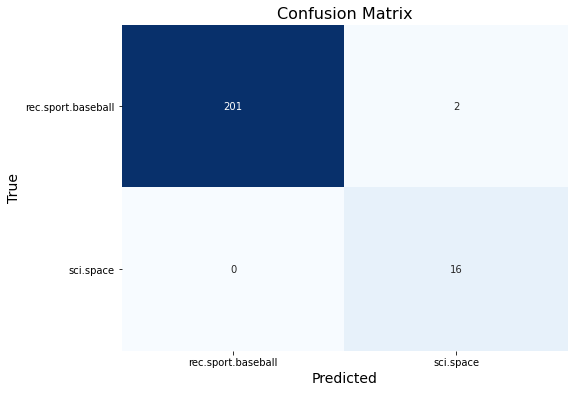

In [4]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.xticks([0.5, 1.5], ['rec.sport.baseball', 'sci.space'])
    plt.yticks([0.5, 1.5], ['rec.sport.baseball', 'sci.space'], rotation=0)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

plot_confusion_matrix(y_test, y_pred)
